Project: Multi-Modal Candidate Shortlisting System  

Objective:  


  

Develop an intelligent system that can assess job candidates using both their resume text and structured profile data to predict whether they should be shortlisted for an interview.
This project simulates a real-world application of deep learning in human resource analytics. It integrates natural language processing and tabular data modeling, encouraging students to apply multi-branch architectures, training strategies, and evaluation metrics used in modern AI systems.



In [1]:
# imports all the needed functions and libraries etc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import re
import tensorflow


KeyboardInterrupt: 

Dataset  

You may use or simulate a dataset composed of the following:  

● Resume Texts: Free-form textual content describing candidates’ experiences, education, and skills.  

● Profile Features: Structured attributes such as degree, GPA, years of experience, age, field of study, job role applied for, etc.  

● Target Label: Binary label indicating whether the candidate was shortlisted (1) or not (0).  

Suitable Sources  

● [Resume Dataset](https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset) on Kaggle  


● Additional synthetic or real tabular data (if required)

In [ ]:
dataset = pd.read_csv("resume_dataset.csv")
categories = dataset["Category"].unique()
print("Categories present in total for all roles: ")
print(categories)


role_skill_keywords = {
    "Data Science": [
        "python", "machine learning", "deep learning", "data analysis",
        "pandas", "numpy", "tensorflow", "pytorch", "statistics", "modeling"
    ],
    "HR": [
        "recruitment", "onboarding", "hr policies", "employee engagement",
        "training", "talent acquisition", "performance management", "hrms"
    ],
    "Advocate": [
        "legal", "litigation", "contract", "court", "law",
        "compliance", "drafting", "legal research", "case", "attorney"
    ],
    "Arts": [
        "painting", "illustration", "sculpture", "design",
        "creative", "gallery", "exhibition", "fine arts", "aesthetics"
    ],
    "Web Designing": [
        "html", "css", "javascript", "figma", "ui/ux",
        "responsive", "photoshop", "web design", "wireframe", "bootstrap"
    ],
    "Mechanical Engineer": [
        "solidworks", "autocad", "thermodynamics", "mechanical",
        "cad", "manufacturing", "matlab", "creo", "ansys", "mechanics"
    ],
    "Sales": [
        "sales", "negotiation", "client acquisition", "crm",
        "cold calling", "lead generation", "target", "bdm", "deal"
    ],
    "Health and fitness": [
        "fitness", "nutrition", "exercise", "trainer",
        "gym", "yoga", "personal trainer", "health", "strength", "diet"
    ],
    "Civil Engineer": [
        "autocad", "civil", "construction", "structural",
        "estimation", "site engineer", "surveying", "concrete", "roads"
    ],
    "Java Developer": [
        "java", "spring", "hibernate", "jsp", "servlets",
        "j2ee", "maven", "junit", "api", "rest"
    ],
    "Business Analyst": [
        "requirement", "documentation", "business analysis", "gap analysis",
        "stakeholder", "brd", "frd", "uml", "agile", "scrum"
    ],
    "SAP Developer": [
        "sap", "abap", "fi", "co", "hana",
        "module", "erp", "bapi", "sapui5", "fiori"
    ],
    "Automation Testing": [
        "selenium", "testng", "automation", "cypress",
        "junit", "test case", "qa", "scripting", "bug", "regression"
    ],
    "Electrical Engineering": [
        "electrical", "circuit", "power", "electronics",
        "transformer", "control systems", "simulation", "matlab", "microcontroller"
    ],
    "Operations Manager": [
        "operations", "supply chain", "logistics", "vendor",
        "inventory", "planning", "procurement", "kpi", "efficiency"
    ],
    "Python Developer": [
        "python", "django", "flask", "api", "scripting",
        "automation", "pandas", "numpy", "rest", "sql"
    ],
    "DevOps Engineer": [
        "devops", "docker", "kubernetes", "ci/cd",
        "jenkins", "ansible", "terraform", "aws", "monitoring", "pipeline"
    ],
    "Network Security Engineer": [
        "network", "firewall", "security", "vpn",
        "penetration testing", "ccna", "encryption", "siem", "cybersecurity"
    ],
    "PMO": [
        "project management", "pmo", "reporting", "dashboard",
        "status tracking", "milestones", "project plan", "excel", "communication"
    ],
    "Database": [
        "sql", "database", "oracle", "mysql", "query",
        "normalization", "joins", "indexing", "stored procedure", "performance tuning"
    ],
    "Hadoop": [
        "hadoop", "mapreduce", "hdfs", "hive", "spark",
        "pig", "yarn", "big data", "cloudera", "sqoop"
    ],
    "ETL Developer": [
        "etl", "data warehouse", "informatica", "ssis",
        "data pipeline", "extraction", "transformation", "loading", "data integration"
    ],
    "DotNet Developer": [
        "c#", ".net", "asp.net", "mvc", "web api",
        "entity framework", "linq", "sql server", "visual studio", "razor"
    ],
    "Blockchain": [
        "blockchain", "solidity", "smart contract", "ethereum",
        "nft", "web3", "crypto", "dapp", "decentralized", "metamask"
    ],
    "Testing": [
        "manual testing", "test case", "qa", "bug",
        "regression", "test plan", "defect", "reporting", "jira", "functional testing"
    ]
}


def score_resume(resume_text, job_role):
    score = 0
    resume_text = resume_text.lower()
    skills = role_skill_keywords.get(job_role, [])

    for skill in skills:
        if skill in resume_text:
            score += 1

    return score


def generate_label(resume_text, job_role, threshold = 2):
    score = score_resume(resume_text, job_role)
    return 1 if score >= threshold else 0

def label_row(row):
    return generate_label(row["Resume"], row["Category"],2)

dataset["Label"] = dataset.apply(label_row, axis=1)
not_shortlisted = dataset[dataset["Label"] == 0]
print(dataset["Label"].value_counts())
dataset.to_csv("resume_dataset_with_labels.csv", index=False)

Categories present in total for all roles: 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
Label
1    786
0    176
Name: count, dtype: int64


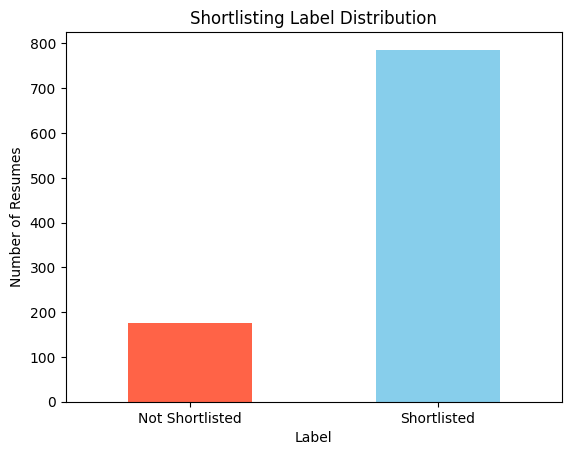

In [ ]:
value_counts = dataset["Label"].value_counts().sort_index()

value_counts.plot(kind='bar', color=['tomato', 'skyblue'])
plt.xticks([0, 1], ["Not Shortlisted", "Shortlisted"], rotation=0)
plt.ylabel("Number of Resumes")
plt.title("Shortlisting Label Distribution")
plt.show()


Task Description  

You are required to build a multi-modal deep learning model that:  

● Extracts meaningful features from resumes using a deep NLP model.  

● Processes structured profile features using a feedforward neural network.  

● Combines the two modalities to produce a final prediction indicating the likelihood of the candidate being shortlisted.

**1. Data Preprocessing **

● Clean and tokenize resume texts.  

● Encode categorical variables (e.g., degree, field).  

● Normalize numerical features.  

● (Optional) Utilize pre-trained word embeddings (e.g., GloVe) or contextual embeddings (e.g., BERT).

In [ ]:
# clean and tokenize resume texts
# text preprocessing for resume branch
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'[^\w\s\.\+]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

dataset["Cleaned_Resume"] = dataset["Resume"].apply(clean_text)


# build vocabulary and tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenize
MAX_VOCAB = 10000
MAX_SEQ_LEN = 500
tokenizer = Tokenizer(num_words=MAX_VOCAB,oov_token='<OOV>')
tokenizer.fit_on_texts(dataset["Cleaned_Resume"])
sequences = tokenizer.texts_to_sequences(dataset["Cleaned_Resume"])
X_text = pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

In [ ]:
# Encode categorical variables (tabular branch) like degree , field
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
category_encoded = encoder.fit_transform(dataset[["Category"]])




In [ ]:
# normalize numerical features

# Here the main issue I have faced is that the resume text is so messy looking and it is "not very practical" to find out
# CGPA and experience by using Regex pattern matching technique from such random resume texts

# So I am synthetically generating the Experience and CGPA columns for better training of multi-branch architecture
# model

# normalize

dataset["GPA"] = np.round(np.random.uniform(6.0, 10.0, size=len(dataset)), 2)
def simulate_experience(role):
    if "Manager" in role or "Senior" in role:
        return np.random.randint(5, 11)
    elif "Engineer" in role or "Developer" in role:
        return np.random.randint(2, 8)
    else:
        return np.random.randint(0, 6)

dataset["Experience"] = dataset["Category"].apply(simulate_experience)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = scaler.fit_transform(dataset[["Experience", "GPA"]])

dataset.to_csv("resume_dataset_after_adding_experience_cgpa.csv")

In [ ]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:



# utilize pre trained word embeddings like GloVe

# load glove embeddings
def load_glove_embeddings(glove_file_path):
  embeddings_index = {}
  with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = vector
  return embeddings_index



glove_file_path = 'glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(glove_file_path)

# build vocabulary from resume texts

from collections import Counter
def tokenize(text):
  return text.lower().split()


all_tokens = []
for text in dataset["Cleaned_Resume"]:
    all_tokens.extend(tokenize(text))

# build vocab with most common words
vocab_limit = 20000
word_freq = Counter(all_tokens)
vocab = {word: i+2 for i, (word, _) in enumerate(word_freq.most_common(vocab_limit))}
vocab["<pad>"] = 0
vocab["<unk>"] = 1


# create embedding matrix

embedding_dim = 100
embedding_matrix = np.zeros((len(vocab), embedding_dim))

for word, idx in vocab.items():
    if word in embeddings_index:
        embedding_matrix[idx] = embeddings_index[word]
    else:
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=(embedding_dim,))





In [ ]:
embedding_tensor = torch.tensor(embedding_matrix, dtype=torch.float32)
embedding_layer = torch.nn.Embedding.from_pretrained(embedding_tensor, freeze=False)

# convert text to index sequences

def text_to_indices(text, vocab, max_len=100):
    tokens = tokenize(text)
    indices = [vocab.get(token, vocab["<unk>"]) for token in tokens]
    if len(indices) < max_len:
        indices += [vocab["<pad>"]] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
    return indices

# Apply to dataset
dataset["Resume_Indices"] = dataset["Cleaned_Resume"].apply(lambda x: text_to_indices(x, vocab))
dataset.to_csv("resume_dataset_after_glove_embeddings.csv")

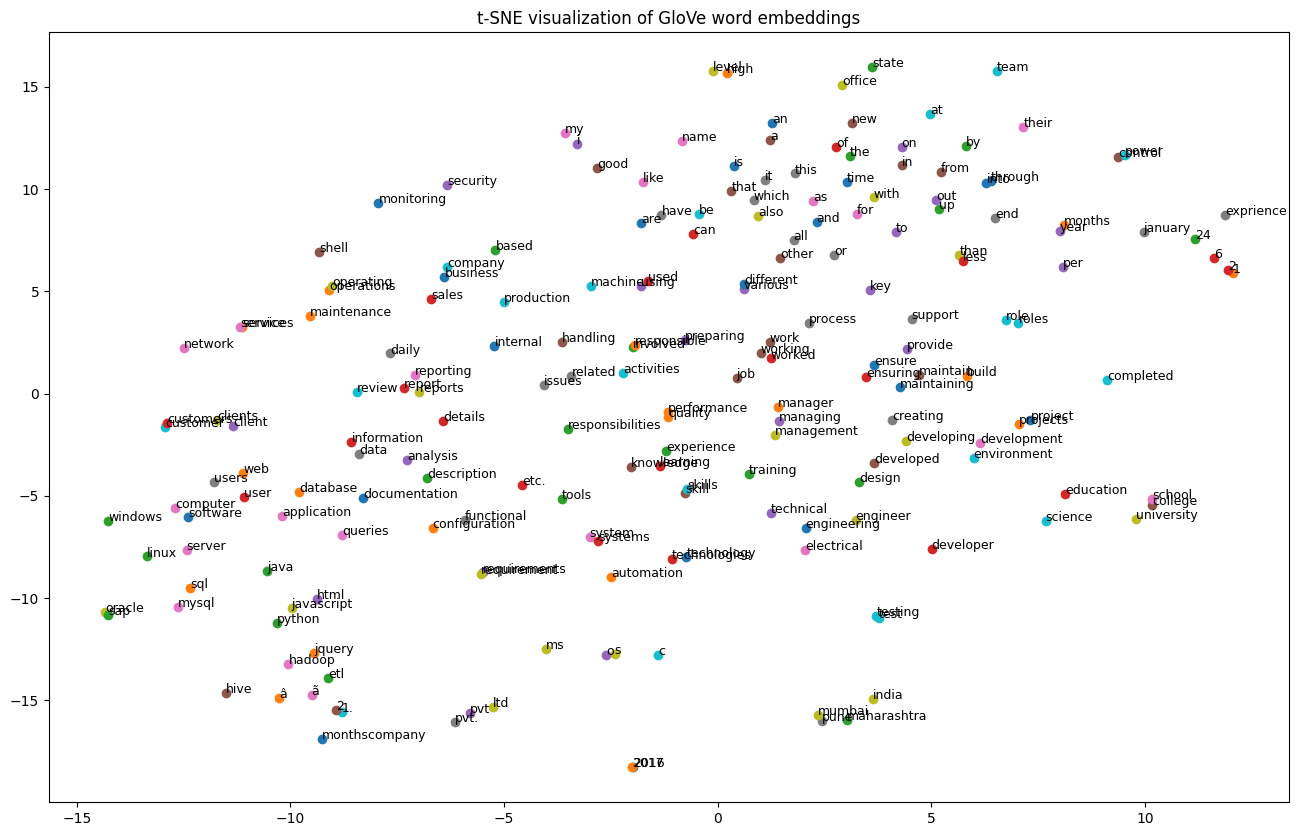

In [ ]:
from sklearn.manifold import TSNE


# Select a subset of words for visualization (e.g., 200 common words)
words_to_visualize = list(vocab.keys())[:200]
vectors = []

for word in words_to_visualize:
    idx = vocab[word]
    vectors.append(embedding_matrix[idx])

vectors = np.array(vectors)

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(16, 10))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]), fontsize=9)
plt.title("t-SNE visualization of GloVe word embeddings")
plt.show()


**2. Model Architecture **

● Construct a dual-branch network:  

○ Text Branch: Implement using CNN, LSTM, or a transformer model (BERT or equivalent).  

○ Tabular Branch: Use a multilayer perceptron (MLP) with appropriate activation functions, dropout, and normalization.  

● Merge both branches before final classification layers.  


In [ ]:
!pip install transformers
from transformers import AutoModel

bert = AutoModel.from_pretrained("bert-base-uncased")
print(bert)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

ValueError: Could not find BertModel neither in <module 'transformers.models.bert' from '/usr/local/lib/python3.11/dist-packages/transformers/models/bert/__init__.py'> nor in <module 'transformers' from '/usr/local/lib/python3.11/dist-packages/transformers/__init__.py'>!

In [ ]:
from transformers.models.bert.modeling_bert import BertModel
import torch.nn as nn

class ResumeModel(nn.Module):
  def __init__(self,tabular_input_dim=2,tabular_hidden_dim=64,dropout=0.3,freeze_bert=False):
    super(ResumeModel,self).__init__()

    # Text branch built using BERT transformer model
    self.bert = BertModel.from_pretrained("bert-base-uncased")
    self.text_dropout = nn.Dropout(dropout)

    if freeze_bert:
      for param in self.bert.parameters():
        param.requires_grad = False

    # Tabular branch built using MLP

    self.tabular_net = nn.Sequential(
        nn.Linear(tabular_input_dim, tabular_hidden_dim),
        nn.ReLU(),
        nn.BatchNorm1d(tabular_hidden_dim),
        nn.Dropout(dropout),
        nn.Linear(tabular_hidden_dim, 32),
        nn.ReLU()
    )

    # Merged classifier

    combined_input_dim = self.bert.config.hidden_size+32
    self.classifier = nn.Sequential(
            nn.Linear(combined_input_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )


  def forward(self,input_ids,attention_mask,tabular_data):
    # Text branch
    text_output = self.bert(input_ids=input_ids,attention_mask=attention_mask)
    text_feat = self.text_dropout(text_output.pooler_output)

    # Tabular branch

    tabular_feat = self.tabular_net(tabular_data)

    # Merge branches
    combined = torch.cat((text_feat, tabular_feat), dim=1)

    # Final output
    logits = self.classifier(combined)
    return logits  # raw logits for use with BCEWithLogitsLoss

AttributeError: partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)